<a href="https://colab.research.google.com/github/Jitukhamcha/DL_PyTorch/blob/master/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch, numpy
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5),)])

In [4]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


In [0]:
data_iter = iter(trainloader)
images, labels = data_iter.next()
#helper.imshow(images[0,:])

In [0]:
# model = nn.Sequential(nn.Linear(784, 256),
#                      nn.ReLU(),
#                      nn.Linear(256, 128),
#                      nn.ReLU(),
#                      nn.Linear(128,64),
#                      nn.ReLU(),
#                      nn.Linear(64, 10),
#                      nn.LogSoftmax(dim = 1))

class Classifier(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p):
        super().__init__()
        
        #input to hidden layers
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        #add a variable number of more hidden layer
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p = drop_p)
#         self.fc1 = nn.Linear(784, 256)
#         self.fc2 = nn.Linear(256, 128)
#         self.fc3 = nn.Linear(128, 64)
#         self.fc4 = nn.Linear(64, 10)

#         # Dropout module with 0.2 drop probability
#         self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        
        for each in self.hidden_layers:
            x = F.relu(each(x))
            x = self.dropout(x)
        x = self.output(x)
        return F.log_softmax(x, dim = 1)
#         # make sure input tensor is flattened
#         x = x.view(x.shape[0], -1)

#         # Now with dropout
#         x = self.dropout(F.relu(self.fc1(x)))
#         x = self.dropout(F.relu(self.fc2(x)))
#         x = self.dropout(F.relu(self.fc3(x)))

#         # output so no dropout here
#         x = F.log_softmax(self.fc4(x), dim=1)

#        return x

In [0]:
model = Classifier(784, 10, [256, 128, 10], 0.2)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [8]:
epochs = 50
steps = 0
training_losses, testing_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
    #turn off the gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                loss = criterion(log_ps , labels)
                test_loss += loss
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)) 
                
            training_losses.append(running_loss/len(trainloader))
            testing_losses.append(test_loss/len(testloader))
            
            print(f'Epoch: {e+1}/{epochs}.. ',
              f"Training Loss: {running_loss/len(trainloader):.3f}.. ",
              f"Test Loss: {test_loss/len(testloader):.3f}.. ",
              f"Test Accuracy: {accuracy/len(testloader):.3f}")
       

Epoch: 1/50..  Training Loss: 0.799..  Test Loss: 0.688..  Test Accuracy: 0.757
Epoch: 2/50..  Training Loss: 0.618..  Test Loss: 0.622..  Test Accuracy: 0.780
Epoch: 3/50..  Training Loss: 0.573..  Test Loss: 0.576..  Test Accuracy: 0.800
Epoch: 4/50..  Training Loss: 0.539..  Test Loss: 0.567..  Test Accuracy: 0.805
Epoch: 5/50..  Training Loss: 0.518..  Test Loss: 0.553..  Test Accuracy: 0.813
Epoch: 6/50..  Training Loss: 0.510..  Test Loss: 0.555..  Test Accuracy: 0.806
Epoch: 7/50..  Training Loss: 0.494..  Test Loss: 0.576..  Test Accuracy: 0.807
Epoch: 8/50..  Training Loss: 0.493..  Test Loss: 0.539..  Test Accuracy: 0.816
Epoch: 9/50..  Training Loss: 0.481..  Test Loss: 0.540..  Test Accuracy: 0.818
Epoch: 10/50..  Training Loss: 0.475..  Test Loss: 0.565..  Test Accuracy: 0.814
Epoch: 11/50..  Training Loss: 0.472..  Test Loss: 0.533..  Test Accuracy: 0.826
Epoch: 12/50..  Training Loss: 0.463..  Test Loss: 0.576..  Test Accuracy: 0.812
Epoch: 13/50..  Training Loss: 0.460.

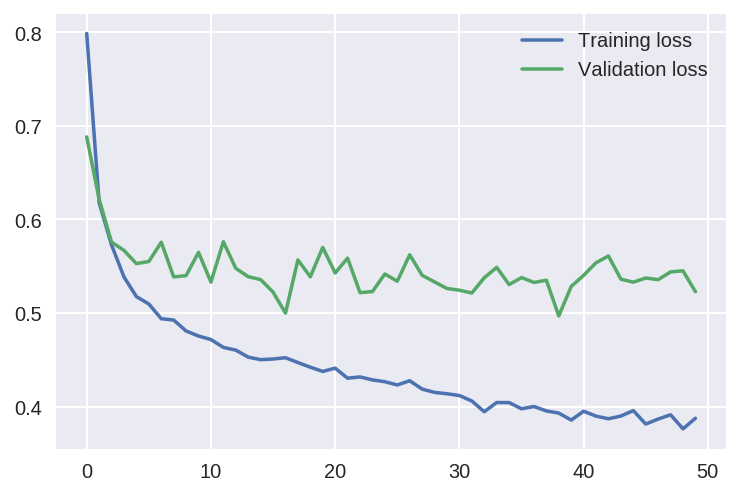

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(training_losses, label='Training loss')
plt.plot(testing_losses, label='Validation loss')
plt.legend(frameon=False)

In [10]:
print("our model: \n\n", model, "\n")

our model: 

 Classifier(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
  (output): Linear(in_features=10, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
) 



In [11]:
print("the state dict keys : ", model.state_dict().keys())

the state dict keys :  odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [0]:
#saving our network
torch.save(model.state_dict(), 'checkpoint.pth')

In [13]:
#load our network
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [0]:
model.load_state_dict(state_dict)

In [0]:
# model = Classifier(784, 10, [400, 200, 100])
# model.load_state_dict(state_dict)
#this will not work as hidden layers are differ from the original one 

In [0]:
checkpoint = {
    'input_size': 784,
    'output_size': 10,
    'hidden_layers':[each.out_features for each in model.hidden_layers],
    'drop_p': 0.2,
    'state_dict': model.state_dict()
}
torch.save(checkpoint, "checkpoint.pth")

In [0]:
def load_checkpoint(file_path):
    checkpoint = torch.load(file_path)
    model = Classifier(checkpoint['input_size'],
                      checkpoint['output_size'],
                      checkpoint['hidden_layers'],
                      checkpoint['drop_p'])
    model.state_dict(checkpoint['state_dict'])
    
    return model
    

In [18]:
model = load_checkpoint('checkpoint.pth')
print(model)

Classifier(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
  (output): Linear(in_features=10, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)
